In [30]:
#inporting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#reading from excel
df = pd.read_excel('HINDALCO_1D.xlsx')

In [32]:
df.head()

,datetime,close,high,low,open,volume,instrument
0,2014-01-24,114.00,115.35,113.00,113.15,5737135.0,HINDALCO
1,2014-01-27,111.10,112.70,109.30,112.00,8724577.0,HINDALCO
2,2014-01-28,113.80,115.00,109.75,110.00,4513345.0,HINDALCO
3,2014-01-29,111.75,114.75,111.15,114.50,4713458.0,HINDALCO
4,2014-01-30,108.10,110.70,107.60,110.20,5077231.0,HINDALCO


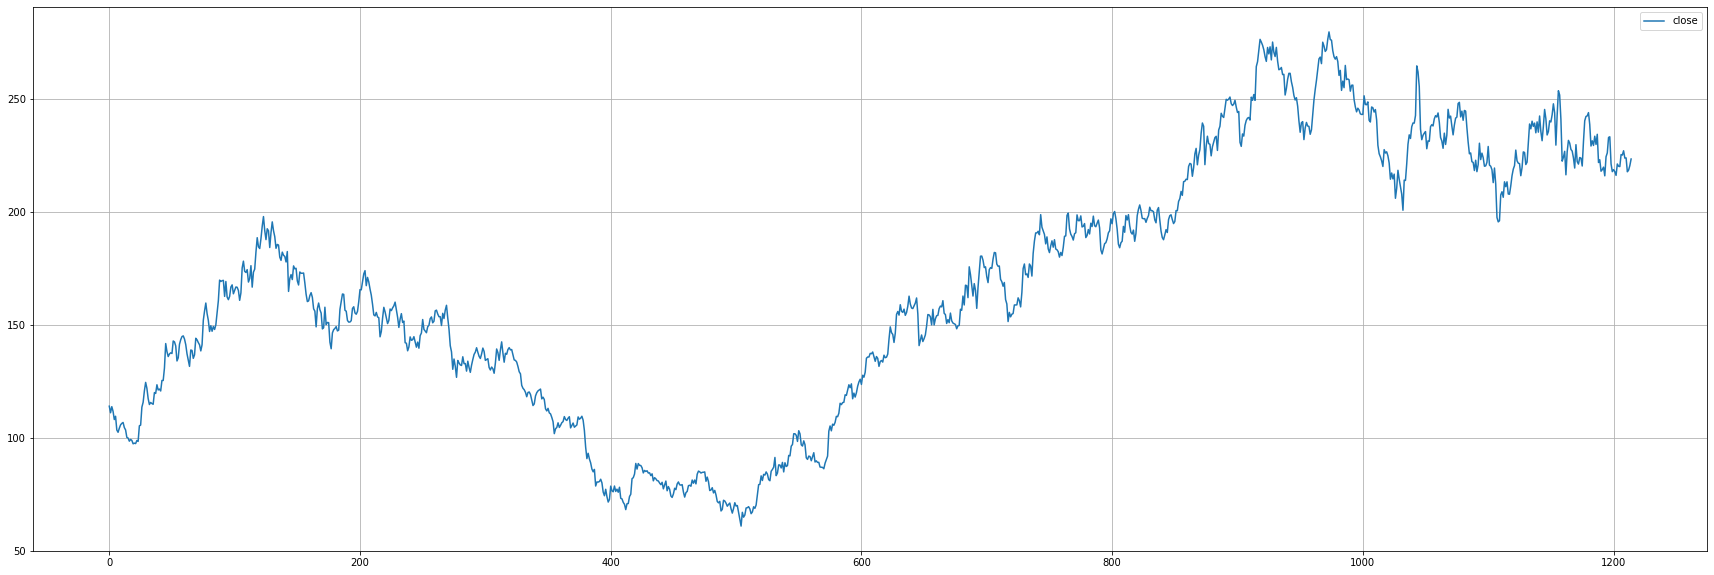

In [33]:
#simple moving average crossover strategy

#df with closing prices

close_df = df.iloc[:, :2]

plt.figure(figsize=(30,10))
close_df['close'].plot()
plt.grid()
plt.legend()
plt.show()


In [34]:
# 20 days rolling average column (fast average)
close_df['SMA_20'] = close_df['close'].rolling(window=20,min_periods=1).mean()

# 50 days rolling average column (slow average)
close_df['SMA_50'] = close_df['close'].rolling(window=50,min_periods=1).mean()

close_df.head()

,datetime,close,SMA_20,SMA_50
0,2014-01-24,114.00,114.000000,114.000000
1,2014-01-27,111.10,112.550000,112.550000
2,2014-01-28,113.80,112.966667,112.966667
3,2014-01-29,111.75,112.662500,112.662500
4,2014-01-30,108.10,111.750000,111.750000


In [35]:
# signal states that if fast average is greater than the slower average
# 1 if fast > slow, otherwise 0
close_df['signal'] = 0.0

close_df['signal'] = np.where(close_df['SMA_20'] > close_df['SMA_50'], 1.0, 0.0)

close_df.tail()

,datetime,close,SMA_20,SMA_50,signal
1210,2018-12-21,224.00,222.5775,226.302,0.0
1211,2018-12-24,217.85,222.5300,226.121,0.0
1212,2018-12-26,218.60,222.4650,226.163,0.0
1213,2018-12-27,220.60,222.6925,226.041,0.0
1214,2018-12-28,223.50,222.6425,225.876,0.0


In [36]:
# position is diff between two consecutive signals
# position = 1 => if signal changes from 0 to 1 indicating a buy call
# position = -1 => if signal changes from 1 to 0 indicating a sell call
close_df['position'] = close_df['signal'].diff()
close_df.head()

,datetime,close,SMA_20,SMA_50,signal,position
0,2014-01-24,114.00,114.000000,114.000000,0.0,NaN
1,2014-01-27,111.10,112.550000,112.550000,0.0,0.0
2,2014-01-28,113.80,112.966667,112.966667,0.0,0.0
3,2014-01-29,111.75,112.662500,112.662500,0.0,0.0
4,2014-01-30,108.10,111.750000,111.750000,0.0,0.0


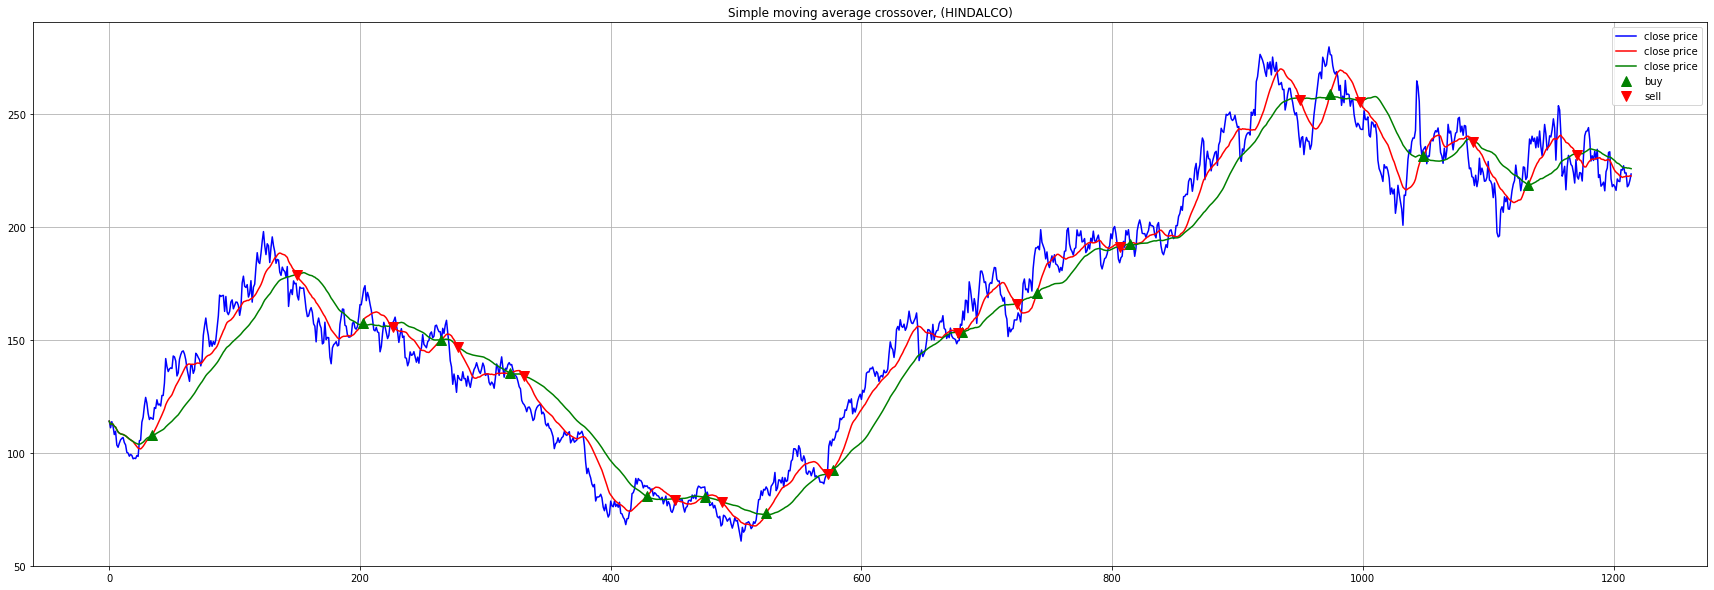

In [37]:
plt.figure(figsize=(30, 10))
# close prices
close_df['close'].plot(color='blue', label="close price")

# fast average (20 days rolling)
close_df['SMA_20'].plot(color='red', label="close price")

# slow average (50 days rolling)
close_df['SMA_50'].plot(color='green', label="close price")

# buy call symbol
plt.plot(close_df[close_df['position'] ==1].index, close_df['SMA_20'][close_df['position']==1], '^', markersize = 10, color='g', label='buy')

# sell call symbol
plt.plot(close_df[close_df['position'] ==-1].index, close_df['SMA_20'][close_df['position']==-1], 'v', markersize = 10, color='r', label='sell')

plt.legend()
plt.grid()
plt.title("Simple moving average crossover, (HINDALCO)")
plt.show()